### Capstone I - NHANES Data Storytelling

The goal of this project is to identify ways to predict, and therefore prevent, hospital readmissions, with a focus on patients with cardiovascular disease. We will investigate risk factors for individuals with hospital stays of greater than 1 night, based on data from the Centers for Disease Control and Preventions National Health and Nutrition Examination Survey (NHANES) from 2015-2016. For the data storytelling portion of the project, some of the questions we will be asking include:

-	How does number of hospital stays differ between people of different ethnicities?
-	How does number of hospital stays differ between people with different food security?
-	Is there a relationship between blood lab levels and number of hospital nights?
-	Is there a relationship between CVD overall and number of hospital stays?
-	Does the depression score have an impact number of hospital stays?
-	Is there a relationship between people with cardiovascular disease (CVD) and depression (or other variables) and # hospital stays?
        
2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

3. Can you make a bar plot or a histogram?

4. Can you compare two related quantities?

5. Can you make a scatterplot?


Looking at the plots, what are some insights you can make? 

8. Do you see any correlations? 

9. Is there a hypothesis you’d like to investigate further? 

10. What other questions do the insights lead you to ask?


Now that you’ve asked questions, hopefully you’ve found some interesting insights.
11. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? 

12. What are some other trends/relationships you think will make the story more complete?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Reading in the data.

In [2]:
nhanes = pd.read_csv('nhanes.csv')


In [3]:
pd.set_option('display.max_columns',200)
nhanes.head()

,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new,new_chf,cvd,cvd_onset_age,new_cvd
0,83732.0,62.0,0.0,white,NaN,english,NaN,27.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,40.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,0.0,NaN,46.0,NaN,NaN,173.0,7.0,9.8,23.9,8.2,63.5,4.0,0.5,4.93,15.2,44.7,90.8,30.8,34.0,13.9,181.0,8.3,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,2.9,94.0,22.0,70.0,4.30,110.0,136.0,272.0,4.7,0.5,7.5,158.0,4.2,1.0,0,False,0,NaN,False
1,83733.0,53.0,0.0,white,NaN,NaN,NaN,30.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,101.0,63.0,147.0,173.0,265.0,5.5,7.3,31.3,9.7,54.8,2.6,1.8,4.89,17.5,49.7,101.8,35.8,35.1,13.4,170.0,9.6,4.5,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,2.9,94.0,75.0,161.0,4.55,108.0,140.0,278.0,4.4,0.6,7.4,170.0,7.0,2.0,0,False,0,NaN,False
2,83734.0,78.0,0.0,white,NaN,english,NaN,28.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,3.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,60.0,55.0,NaN,52.0,NaN,NaN,NaN,58.0,NaN,59.0,39.0,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,0.0,84.0,30.0,269.0,145.0,229.0,5.8,4.4,29.9,9.6,55.8,3.9,0.9,4.18,12.4,37.9,90.8,29.6,32.6,14.7,223.0,9.0,4.5,46.0,30.0,29.0,26.0,24.0,9.7,236.0,160.0,106.0,1.12,2.8,103.0,11.0,72.0,4.70,151.0,140.0,284.0,3.6,0.5,7.3,299.0,7.3,2.0,0,False,1,58.0,False
3,83735.0,56.0,1.0,white,NaN,english,NaN,42.4,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0,50.9,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,61.0,NaN,NaN,174.0,5.6,6.1,17.1,10.3,68.7,3.1,0.9,4.54,12.8,40.1,88.3,28.2,31.9,13.1,280.0,9.1,3.8,65.0,23.0,26.0,13.0,24.0,8.9,179.0,66.0,106.0,0.96,2.3,63.0,19.0,43.0,4.08,172.0,141.0,279.0,3.8,0.3,6.1,93.0,5.4,13.0,0,False,0,NaN,False
4,83736.0,42.0,1.0,black,NaN,english,NaN,20.3,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,NaN,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,84.0,53.0,47.0,142.0,204.0,5.6,4.2,47.1,7.

In [4]:
nhanes.describe()

,seqn,age,gender,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new,cvd,cvd_onset_age
count,5992.000000,5992.000000,5992.000000,5662.000000,5164.000000,5164.000000,5164.000000,5162.000000,5162.000000,5162.000000,5161.000000,5161.000000,5161.000000,3579.000000,3012.000000,5766.000000,5988.000000,5005.000000,5987.000000,5708.000000,5711.000000,5708.000000,5693.000000,5701.000000,5710.000000,5714.000000,5712.000000,5708.000000,5704.000000,5707.000000,5712.000000,5982.000000,5714.000000,5711.000000,887.000000,1433.000000,263.000000,830.000000,209.000000,239.000000,131.000000,246.000000,205.000000,121.000000,610.000000,296.000000,256.000000,163.000000,22.000000,4.000000,1.0,13.000000,2.00000,32.000000,0.0,84.000000,22.000000,36.000000,2.000000,0.0,8.000000,0.0,13.000000,6.000000,15.00000,11.000000,44.000000,4.000000,0.0,21.000000,3.000000,97.000000,2.000000,44.000000,53.000000,0.0,4.000000,5992.000000,2573.000000,5394.000000,2363.000000,2339.000000,5394.000000,5441.000000,5423.000000,5422.000000,5422.000000,5422.000000,5.422000e+03,5422.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5439.000000,5423.000000,5423.000000,5423.000000,5386.000000,5385.000000,5386.000000,5386.000000,5385.000000,5387.000000,5387.000000,5384.000000,5378.000000,5387.000000,5385.000000,5382.000000,5387.000000,5386.000000,5383.000000,5387.000000,5386.000000,5387.000000,5384.000000,5386.000000,5.384000e+03,5383.000000,5384.000000,5384.000000,3579.000000,5992.000000,5992.000000,625.000000
mean,88676.950935,48.121996,0.518191,29.382197,0.422541,0.346631,0.617157,0.783611,0.407400,0.248741,0.258865,0.168378,0.062779,0.290305,32.855644,2.628859,0.141116,0.098302,0.152163,0.257533,0.047452,0.037491,0.042860,0.023329,0.043958,0.036577,0.021884,0.108970,0.053296,0.045383,0.033964,0.027583,0.096080,0.041849,21.099211,49.081647,50.174905,48.933735,57.143541,57.029289,49.358779,56.662602,55.751220,52.776860,44.714754,35.324324,42.484375,24.895706,66.772727,42.000000,70.0,49.230769,70.50000,42.875000,NaN,55.464286,31.136364,58.500000,67.500000,NaN,57.750000,NaN,45.076923,54.000000,68.60000,48.000000,57.909091,61.500000,NaN,42.047619,47.666667,64.309278,53.500000,57.909091,60.358491,NaN,56.750000,0.170561,112.764866,54.134779,112.610664,111.394186,189.096218,5.822000,7.364503,31.027591,8.137403,57.297990,2.847510e+00,0.814367,4.742095,13.912299,41.836898,88.496515,29.413885,33.214948,13.823898,239.179974,8.367158,4.314779,70.002786,25.795767,25.224285,14.609656,24.463152,9.348023,192.009287,157.993492,103.228513,0.876449,2.872947,104.603304,28.346082,80.943526,3.940590,129.157631,138.642658,277.412519,3.697883,5.501207e-01,7.187628,155.264302,5.395877,5.054484,0.145861,0.105975,54.716800
std,2877.819691,18.521353,0.499711,7.095921,0.872461,0.719062,0.946989,0.931202,0.817394,0.661830,0.686266,0.578470,0.397585,0.616834,8.769377,0.628847,0.348170,0.297752,0.359209,0.4



#### During the data cleaning phase, we identified  133 variables of interest from the 2015-2016 NHANES dataset, including: 
Demographic Information and Other Characteristics:
Age,
Gender,
Ethnicity,
Language, 
Food Security
Depression Score

##### Disease Diagnosis:
diabetes  
prediabetes  
asthma  
arthritis  
gout  
chf  
chd  
angina  
heartattack   
stroke  
emphysema  
thyroid  
bronchitis  
liver  
copd  
jaundice  
cancer  
kidney   


##### Age of onset of diagnosis:
asthma_age  
arthritis_age  
gout_age  
diabetes_age  
chf_age  
chd_age  
angina_age  
mi_age  
cva_age  
emphysema_age  
thyroid_age   
bronchitis_age  
liver_age  
jaundice_age  
ca_bladder_age  
ca_testicular_age  
ca_blood_age  
ca_thyroid_age  
ca_bone_age  
ca_uterine_age  
ca_brain_age  
ca_breast_age  
ca_cervical_age   
ca_colon_age  
ca_esophageal_age  
ca_gallbladder_age  
ca_kidney_age  
ca_larynx_age  
ca_leukemia_age  
ca_liver_age  
ca_lung_age  
ca_hodgkins_age  
ca_melanoma_age  
ca_mouth_age  
ca_nervous_age  
ca_ovarian_age  
ca_pancreatic_age  
ca_prostate_age  
ca_rectal_age  
ca_skin_nonmelanoma_age  
ca_skin_unknown_age  
ca_softtissue_age  
ca_stomach_age  


Physical Measurements (calculated):
Body Mass Index,
Percent Body Fat

Hospital Admission Information:
Hospital stays (total number stays of 1 night or more) in the last year



In [5]:
print(nhanes.shape)
print(nhanes.info())


(5992, 133)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Columns: 133 entries, seqn to new_cvd
dtypes: bool(2), float64(125), int64(2), object(4)
memory usage: 6.0+ MB
None


Next, we create a subset of the nhanes data ('newcvd') that included only these participants. We will also limit the number of hospital stays to 1 or more, and create a feature 'readmission' to separate out participants with positive or negative hospital readmission

In [6]:
# creating sample dataframes with only new_cvd and new_chf participants
newcvd = nhanes[nhanes['new_cvd']==True]
newcvd.info()

newchf = nhanes[nhanes['new_chf']==True]
newchf.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 36 to 5939
Columns: 133 entries, seqn to new_cvd
dtypes: bool(2), float64(125), int64(2), object(4)
memory usage: 65.1+ KB


,seqn,age,gender,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new,cvd,cvd_onset_age
count,30.000000,30.000000,30.000000,27.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,17.000000,4.000000,30.000000,30.000000,23.000000,29.000000,30.000000,30.000000,30.0,29.000000,30.000000,29.000000,29.000000,30.000000,30.000000,30.000000,30.000000,29.000000,30.000000,30.000000,30.000000,11.000000,17.000000,2.000000,5.000000,30.000000,12.000000,8.00000,11.000000,6.000000,3.000000,8.000000,4.000000,3.000000,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,30.000000,14.000000,26.000000,12.000000,12.000000,26.000000,26.00000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,17.000000,30.000000,30.0,30.000000
mean,88869.400000,72.133333,0.566667,30.288889,0.416667,0.458333,1.083333,1.083333,0.416667,0.37500,0.333333,0.208333,0.041667,0.588235,27.800000,2.733333,0.166667,0.217391,0.413793,0.600000,0.066667,1.0,0.448276,0.266667,0.379310,0.206897,0.100000,0.266667,0.133333,0.100000,0.379310,0.033333,0.266667,0.233333,43.454545,60.117647,55.000000,51.800000,72.133333,68.500000,66.62500,64.454545,75.333333,69.000000,52.875000,60.000000,47.666667,35.0,80.0,54.0,NaN,NaN,NaN,37.0,NaN,75.500000,NaN,72.0,NaN,NaN,NaN,NaN,80.0,NaN,76.0,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,80.0,NaN,NaN,1.433333,112.071429,58.615385,84.916667,90.250000,176.730769,6.05000,8.700000,28.134615,8.607692,58.646154,3.819231,0.919231,4.406923,13.103846,39.719231,90.473077,29.807692,32.946154,14.692308,215.846154,8.265385,4.211538,71.192308,25.846154,20.500000,21.730769,25.346154,9.400000,178.807692,108.500000,101.769231,1.176538,2.815385,112.307692,26.692308,74.961538,4.091923,149.153846,139.000000,281.076923,3.857692,0.573077,7.026923,137.538462,6.442308,6.823529,1.033333,1.0,68.200000
std,3127.696813,13.738276,0.504007,9.266330,0.829702,0.779028,1.248187,1.176460,0.717282,0.76967,0.761387,0.588230,0.204124,0.712287,14.876155,0.520830,0.379049,0.421741,0.501230,0.498273,0.253708,0.0,0.506120,0.449776,0.493804,0.412251,0.305129,0.449776,0.345746,0.305129,0.493804,0.182574,0.449776,0.430183,29.046045,20.158380,28.284271,15.943651,13.738276,13.290461,11.03161,13.995454,8.238123,7.937254,24.694924,14.165686,19.399313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.363961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.478194,19.261218,18.387119,42.900431,31.843724,43.904950,0.75591,7.302986,15.436086,2.475629,16.474859,

In [7]:
newcvd= newcvd[newcvd['numhosp_new'] >= 1]
newcvd['readmission'] = newcvd['numhosp_new'] > 1

newchf= newchf[newchf['numhosp_new'] >= 1]
newchf['readmission'] = newchf['numhosp_new'] > 1

newchf

,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new,new_chf,cvd,cvd_onset_age,new_cvd,readmission
275,84183.0,80.0,1.0,other_hisp,spanish_only,NaN,NaN,27.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80.0,80.0,NaN,NaN,80.0,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,41.0,NaN,NaN,147.0,7.2,8.7,27.0,9.3,45.2,16.5,2.1,3.62,10.0,31.1,86.0,27.6,32.0,15.6,287.0,8.2,3.9,61.0,16.0,12.0,16.0,27.0,9.7,146.0,101.0,106.0,0.84,3.5,113.0,18.0,22.0,4.28,155.0,143.0,287.0,3.4,0.4,7.4,195.0,4.6,NaN,2,True,1,80.0,True,True
702,84895.0,80.0,1.0,other_race_or_multiracial,NaN,english,NaN,33.4,1.0,1.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,70.0,75.0,NaN,80.0,NaN,65.0,67.0,NaN,75.0,60.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,63.0,NaN,NaN,176.0,6.1,7.7,34.5,8.0,53.5,3.5,0.7,4.76,14.3,42.4,89.1,30.0,33.7,13.2,217.0,8.1,4.1,70.0,25.0,19.0,18.0,26.0,9.8,171.0,81.0,101.0,0.87,2.8,114.0,25.0,91.0,3.66,132.0,138.0,278.0,2.5,0.5,6.9,189.0,8.5,9.0,2,True,1,65.0,False,True
1156,85632.0,80.0,0.0,white,NaN,english,NaN,26.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,56.0,NaN,NaN,156.0,6.2,5.7,29.6,8.5,46.6,13.5,1.9,3.79,10.4,31.7,83.8,27.5,32.8,17.3,272.0,6.2,4.2,57.0,23.0,12.0,18.0,28.0,8.7,153.0,46.0,98.0,1.20,3.4,87.0,11.0,38.0,3.50,128.0,137.0,274.0,3.8,0.3,7.6,95.0,7.0,NaN,2,True,1,80.0,True,True
1418,86047.0,80.0,1.0,white,NaN,english,NaN,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,60.0,80.0,NaN,NaN,80.0,65.0,65.0,65.0,75.0,72.0,30.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,118.0,102.0,91.0,117.0,237.0,6.0,12.6,3.7,3.7,92.2,0.4,0.2,4.36,12.8,40.3,92.5,29.4,31.8,15.2,266.0,7.8,3.7,56.0,25.0,22.0,26.0,26.0,9.1,254.0,97.0,98.0,1.45,2.4,113.0,16.0,96.0,3.56,196.0,137.0,279.0,4.0,1.3,6.1,113.0,9.4,NaN,2,True,1,65.0,False,True
1454,86097.0,80.0,1.0,white,NaN,english,NaN,16.9,0.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,NaN,50.0,NaN,NaN,80.0,80.0,80.0,80.0,80.0,NaN,75.0,NaN,35.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [8]:
newcvd.readmission = newcvd.readmission.replace(False,'Negative')
newcvd.readmission = newcvd.readmission.replace(True,'Positive')
newchf.readmission = newchf.readmission.replace(False,'Negative')
newchf.readmission = newchf.readmission.replace(True,'Positive')


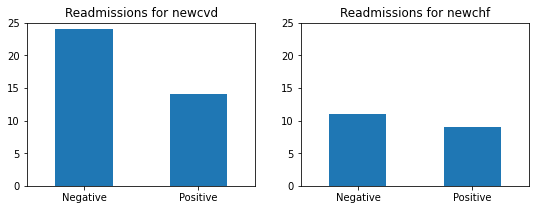

In [9]:

#newcvd.readmission.plot(kind='bar', title='newcvd')

#print('The median number of hospital stays for the newcvd group was: ', newcvd.readmission.median())
#print('The median number of hospital stays for the newchf group was: ', newchf.readmission.median())

#plt.subplot(1,2,1)
#newchf.readmission.value_counts().plot(kind='bar', title='Readmissions for newchf')
#plt.ylim(0,25)
#plt.xlim(-1,3)

#plt.subplot(1,2,2)
#newcvd.readmission.value_counts().plot(kind='bar', title='Readmissions for newcvd')
#plt.ylim(0,25)
#plt.xlim(-1,3)
#plt.show()


plt.figure(figsize=(9, 3))

plt.subplot(121)
newcvd.readmission.value_counts().plot(kind='bar', title='Readmissions for newcvd')
plt.xticks(np.arange(2), ('Negative', 'Positive'), rotation=0)
plt.ylim(0,25)

plt.subplot(122)
newchf.readmission.value_counts().plot(kind='bar', title='Readmissions for newchf')
plt.xticks(np.arange(2), ('Negative', 'Positive'), rotation=0)
plt.ylim(0,25)

plt.show()

In [10]:
nhanes.numhosp_new


0       0
1       0
2       0
3       0
4       0
       ..
5987    0
5988    0
5989    1
5990    0
5991    0
Name: numhosp_new, Length: 5992, dtype: int64

In [11]:
#Creating 2 groups of participants based on number of hospital stays (1 and 2 or more)
negative = nhanes.numhosp_new == 1
positive = nhanes.numhosp_new == 2
nhanes['positive'] = positive
nhanes['negative'] = negative



In [12]:
nhanes.head()

,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new,new_chf,cvd,cvd_onset_age,new_cvd,positive,negative
0,83732.0,62.0,0.0,white,NaN,english,NaN,27.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,40.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,0.0,NaN,46.0,NaN,NaN,173.0,7.0,9.8,23.9,8.2,63.5,4.0,0.5,4.93,15.2,44.7,90.8,30.8,34.0,13.9,181.0,8.3,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,2.9,94.0,22.0,70.0,4.30,110.0,136.0,272.0,4.7,0.5,7.5,158.0,4.2,1.0,0,False,0,NaN,False,False,False
1,83733.0,53.0,0.0,white,NaN,NaN,NaN,30.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,101.0,63.0,147.0,173.0,265.0,5.5,7.3,31.3,9.7,54.8,2.6,1.8,4.89,17.5,49.7,101.8,35.8,35.1,13.4,170.0,9.6,4.5,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,2.9,94.0,75.0,161.0,4.55,108.0,140.0,278.0,4.4,0.6,7.4,170.0,7.0,2.0,0,False,0,NaN,False,False,False
2,83734.0,78.0,0.0,white,NaN,english,NaN,28.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,3.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,60.0,55.0,NaN,52.0,NaN,NaN,NaN,58.0,NaN,59.0,39.0,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,0.0,84.0,30.0,269.0,145.0,229.0,5.8,4.4,29.9,9.6,55.8,3.9,0.9,4.18,12.4,37.9,90.8,29.6,32.6,14.7,223.0,9.0,4.5,46.0,30.0,29.0,26.0,24.0,9.7,236.0,160.0,106.0,1.12,2.8,103.0,11.0,72.0,4.70,151.0,140.0,284.0,3.6,0.5,7.3,299.0,7.3,2.0,0,False,1,58.0,False,False,False
3,83735.0,56.0,1.0,white,NaN,english,NaN,42.4,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0,50.9,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,61.0,NaN,NaN,174.0,5.6,6.1,17.1,10.3,68.7,3.1,0.9,4.54,12.8,40.1,88.3,28.2,31.9,13.1,280.0,9.1,3.8,65.0,23.0,26.0,13.0,24.0,8.9,179.0,66.0,106.0,0.96,2.3,63.0,19.0,43.0,4.08,172.0,141.0,279.0,3.8,0.3,6.1,93.0,5.4,13.0,0,False,0,NaN,False,False,False
4,83736.0,42.0,1.0,black,NaN,english,NaN,20.3,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,NaN,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Next, we will examine the proportion, respectively, of individuals who were not hospitalized (hosp_0), had one hospitalization(negative), and who had 2 or more hospitalizations(positive) based on the presence of various disease diagnoses:

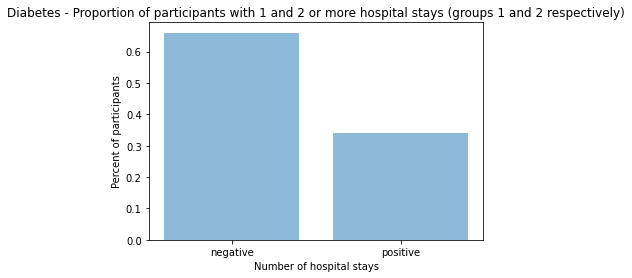

In [13]:
#proportion of readmissions related to various diagnoses:
#diabetes
diabetes1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['diabetes']==1)])
diabetes2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['diabetes']==1)])
negative_diabetes = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['diabetes']==1)])/(diabetes1+diabetes2), 2)
positive_diabetes = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['diabetes']==1)])/(diabetes1+diabetes2),2)
proportions = [negative_diabetes, positive_diabetes]

groups = ('negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('Percent of participants')
plt.title('Diabetes - Proportion of participants with 1 and 2 or more hospital stays (groups 1 and 2 respectively)')
plt.xlabel('Number of hospital stays')
plt.show()

new_cvd proportions:  0.63 0.37


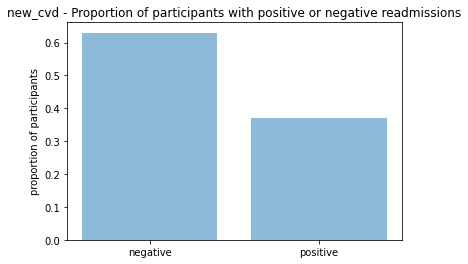

In [14]:
#proportion of readmissions related to various diagnoses:
#new_cvd
new_cvd1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['new_cvd']==1)])
new_cvd2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['new_cvd']==1)])
negative_new_cvd = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['new_cvd']==1)])/(new_cvd1+new_cvd2),2)
positive_new_cvd = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['new_cvd']==1)])/(new_cvd1+new_cvd2),2)
print('new_cvd proportions: ', negative_new_cvd, positive_new_cvd)
proportions = [negative_new_cvd, positive_new_cvd]

groups = ('negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('proportion of participants')
plt.title('new_cvd - Proportion of participants with positive or negative readmissions')

plt.show()

new_chf proportions:  0.45 0.55


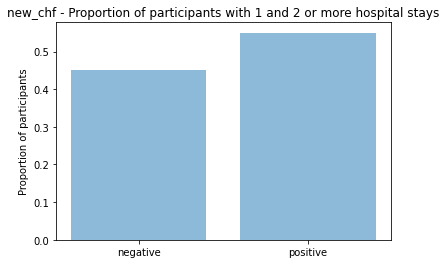

In [15]:
#proportion of readmissions related to various diagnoses:
#new_chf
new_chf1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['new_chf']==1)])
new_chf2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['new_chf']==1)])
negative_new_chf = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['new_chf']==1)])/(new_chf1+new_chf2),2)
positive_new_chf = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['new_chf']==1)])/(new_chf1+new_chf2),2)
print('new_chf proportions: ', negative_new_chf, positive_new_chf)
proportions = [negative_new_chf, positive_new_chf]

groups = ('negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('Proportion of participants')
plt.title('new_chf - Proportion of participants with 1 and 2 or more hospital stays')

plt.show()

#### In participants with new onset CHF, there are more in the positive readmission group.


prediabetes proportions:  0.64 0.36


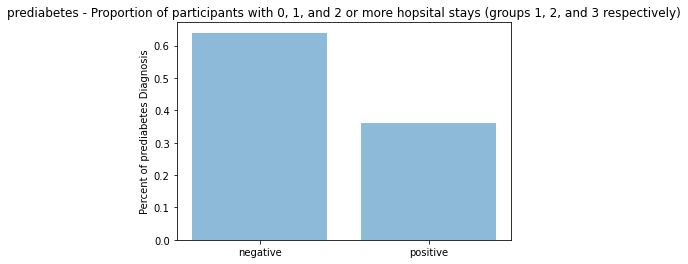

In [16]:
#proportion of readmissions related to various diagnoses:
#prediabetes
prediabetes1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['prediabetes']==1)])
prediabetes2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['prediabetes']==1)])
negative_prediabetes = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['prediabetes']==1)])/(+prediabetes1+prediabetes2),2)
positive_prediabetes = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['prediabetes']==1)])/(+prediabetes1+prediabetes2),2)
print('prediabetes proportions: ', negative_prediabetes, positive_prediabetes)
proportions = [negative_prediabetes, positive_prediabetes]

groups = ('negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('Percent of prediabetes Diagnosis')
plt.title('prediabetes - Proportion of participants with 0, 1, and 2 or more hopsital stays (groups 1, 2, and 3 respectively)')

plt.show()

asthma proportions:  0.66 0.34


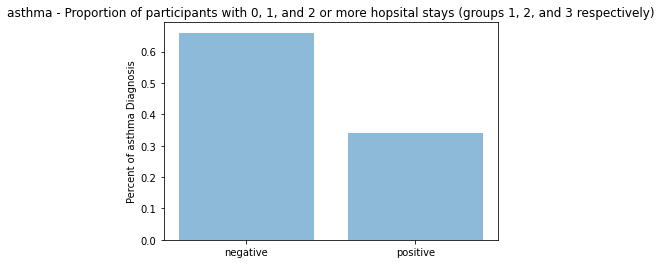

In [17]:
#proportion of readmissions related to various diagnoses:
#asthma
asthma1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['asthma']==1)])
asthma2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['asthma']==1)])
negative_asthma = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['asthma']==1)])/(asthma1+asthma2),2)
positive_asthma = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['asthma']==1)])/(asthma1+asthma2),2)
print('asthma proportions: ',  negative_asthma, positive_asthma)

proportions = [ negative_asthma, positive_asthma]

groups = ('negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('Percent of asthma Diagnosis')
plt.title('asthma - Proportion of participants with 0, 1, and 2 or more hopsital stays (groups 1, 2, and 3 respectively)')

plt.show()

arthritis proportions:  0.65 0.35


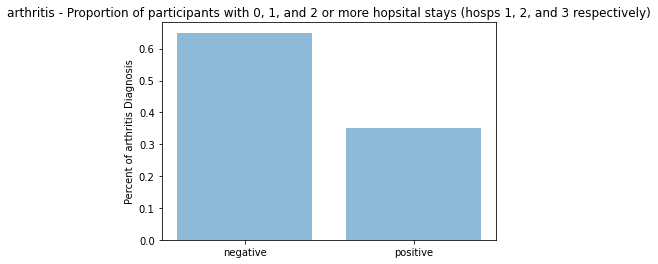

In [18]:
#proportion of readmissions related to various diagnoses:
#arthritis
arthritis1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['arthritis']==1)])
arthritis2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['arthritis']==1)])
negative_arthritis = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['arthritis']==1)])/(arthritis1+arthritis2),2)
positive_arthritis = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['arthritis']==1)])/(arthritis1+arthritis2),2)
print('arthritis proportions: ', negative_arthritis, positive_arthritis)

proportions = [negative_arthritis, positive_arthritis]

hosps = ('negative', 'positive')

plt.bar(hosps, proportions, align='center', alpha=0.5)
plt.xticks(hosps)
plt.ylabel('Percent of arthritis Diagnosis')
plt.title('arthritis - Proportion of participants with 0, 1, and 2 or more hopsital stays (hosps 1, 2, and 3 respectively)')

plt.show()

gout proportions:  0.55 0.45


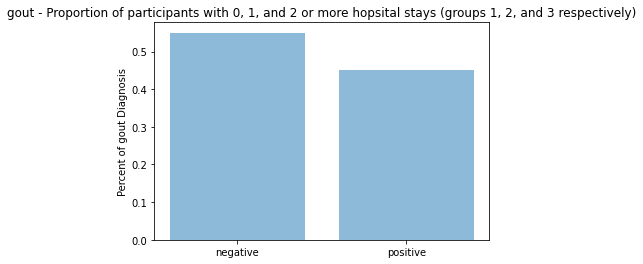

In [19]:

#gout
gout1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['gout']==1)])
gout2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['gout']==1)])
negative_gout = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['gout']==1)])/(gout1+gout2),2)
positive_gout = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['gout']==1)])/(gout1+gout2),2)
print('gout proportions: ', negative_gout, positive_gout)
proportions = [ negative_gout, positive_gout]

groups = ('negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('Percent of gout Diagnosis')
plt.title('gout - Proportion of participants with 0, 1, and 2 or more hopsital stays (groups 1, 2, and 3 respectively)')

plt.show()

chf proportions:  0.5 0.5


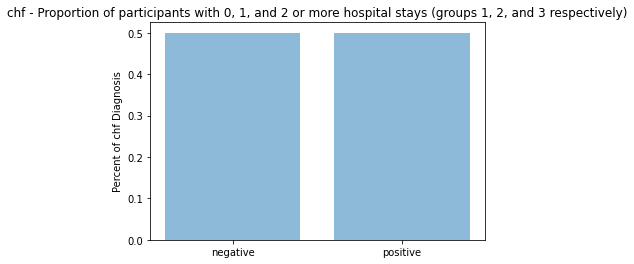

39.0

In [20]:

#chf
chf1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['chf']==1)])
chf2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['chf']==1)])
chf_total = chf1+chf2
negative_chf = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['chf']==1)])/chf_total
positive_chf = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['chf']==1)])/chf_total
print('chf proportions: ', negative_chf, positive_chf)
proportions = [ negative_chf, positive_chf]

groups = ( 'negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('Percent of chf Diagnosis')
plt.title('chf - Proportion of participants with 0, 1, and 2 or more hospital stays (groups 1, 2, and 3 respectively)')

plt.show()
chf_total*positive_chf

chd proportions:  0.53 0.47


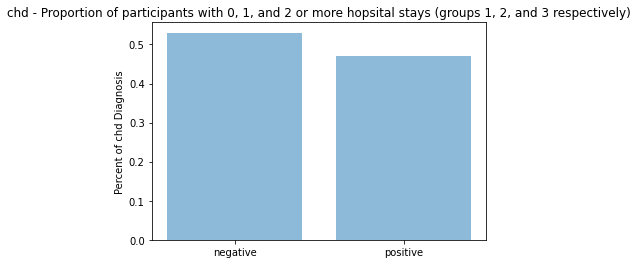

In [21]:
#proportion of readmissions related to various diagnoses:
#chd
chd1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['chd']==1)])
chd2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['chd']==1)])
negative_chd = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['chd']==1)])/(chd1+chd2),2)
positive_chd = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['chd']==1)])/(chd1+chd2),2)
print('chd proportions: ',  negative_chd, positive_chd)

proportions = [ negative_chd, positive_chd]

groups = ( 'negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('Percent of chd Diagnosis')
plt.title('chd - Proportion of participants with 0, 1, and 2 or more hopsital stays (groups 1, 2, and 3 respectively)')

plt.show()

In [22]:
#proportion of readmissions related to various diagnoses:
#angina
angina1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['angina']==1)])
angina2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['angina']==1)])
negative_angina = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['angina']==1)])/(angina1+angina2),2)
positive_angina = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['angina']==1)])/(angina1+angina2),2)
print('angina proportions: ', negative_angina, positive_angina)



angina proportions:  0.72 0.28


In [23]:
#proportion of readmissions related to various diagnoses:
#mi
mi1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['mi']==1)])
mi2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['mi']==1)])
negative_mi = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['mi']==1)])/(mi1+mi2),2)
positive_mi = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['mi']==1)])/(mi1+mi2),2)
print('mi proportions: ', negative_mi, positive_mi)


mi proportions:  0.58 0.42


In [24]:
#proportion of readmissions related to various diagnoses:
#cva
cva1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['cva']==1)])
cva2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['cva']==1)])
negative_cva = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['cva']==1)])/(cva1+cva2),2)
positive_cva = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['cva']==1)])/(cva1+cva2),2)
print('cva proportions: ',  negative_cva, positive_cva)



cva proportions:  0.64 0.36


In [25]:
#proportion of readmissions related to various diagnoses:
#emphysema
emphysema1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['emphysema']==1)])
emphysema2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['emphysema']==1)])
negative_emphysema = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['emphysema']==1)])/(emphysema1+emphysema2),2)
positive_emphysema = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['emphysema']==1)])/(emphysema1+emphysema2),2)
print('emphysema proportions: ',  negative_emphysema, positive_emphysema)



emphysema proportions:  0.52 0.48


In [26]:
#proportion of readmissions related to various diagnoses:
#thyroid
thyroid1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['thyroid']==1)])
thyroid2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['thyroid']==1)])
negative_thyroid = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['thyroid']==1)])/(thyroid1+thyroid2),2)
positive_thyroid = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['thyroid']==1)])/(thyroid1+thyroid2),2)
print('thyroid proportions: ', negative_thyroid, positive_thyroid)



thyroid proportions:  0.68 0.32


In [27]:
#proportion of readmissions related to various diagnoses:
#bronchitis
bronchitis1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['bronchitis']==1)])
bronchitis2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['bronchitis']==1)])
negative_bronchitis = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['bronchitis']==1)])/(bronchitis1+bronchitis2), 2)
positive_bronchitis = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['bronchitis']==1)])/(bronchitis1+bronchitis2), 2)
print('bronchitis proportions: ',  negative_bronchitis, positive_bronchitis)



bronchitis proportions:  0.66 0.34


In [28]:
#proportion of readmissions related to various diagnoses:
#liver
liver1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['liver']==1)])
liver2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['liver']==1)])
negative_liver = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['liver']==1)])/(liver1+liver2), 2)
positive_liver = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['liver']==1)])/(liver1+liver2), 2)
print('liver proportions: ', negative_liver, positive_liver)



liver proportions:  0.53 0.47


In [29]:
#proportion of readmissions related to various diagnoses:
#copd
copd1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['copd']==1)])
copd2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['copd']==1)])
negative_copd = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['copd']==1)])/(copd1+copd2), 2)
positive_copd = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['copd']==1)])/(copd1+copd2), 2)
print('copd proportions: ', negative_copd, positive_copd)



copd proportions:  0.55 0.45


In [30]:
#proportion of readmissions related to various diagnoses:
#jaundice
jaundice1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['jaundice']==1)])
jaundice2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['jaundice']==1)])
negative_jaundice = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['jaundice']==1)])/(jaundice1+jaundice2), 2)
positive_jaundice = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['jaundice']==1)])/(jaundice1+jaundice2), 2)
print('jaundice proportions: ', negative_jaundice, positive_jaundice)


jaundice proportions:  0.5 0.5


cancer proportions:  0.56 0.44


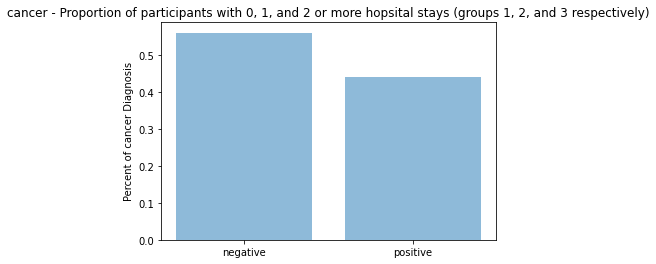

In [31]:
#proportion of readmissions related to various diagnoses:
#cancer
cancer1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['cancer']==1)])
cancer2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['cancer']==1)])
negative_cancer = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['cancer']==1)])/(+cancer1+cancer2),2)
positive_cancer = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['cancer']==1)])/(+cancer1+cancer2),2)
print('cancer proportions: ', negative_cancer, positive_cancer)

proportions = [negative_cancer, positive_cancer]

groups = ('negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('Percent of cancer Diagnosis')
plt.title('cancer - Proportion of participants with 0, 1, and 2 or more hopsital stays (groups 1, 2, and 3 respectively)')

plt.show()


kidney proportions:  0.54 0.46


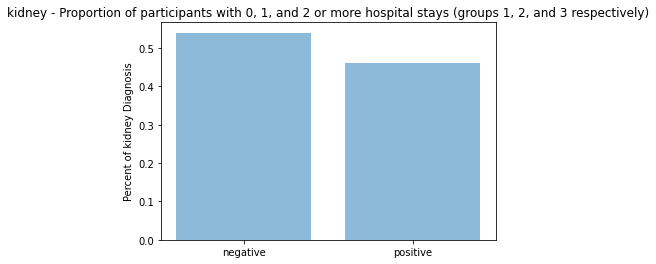

In [32]:
#proportion of readmissions related to various diagnoses:
#kidney
kidney1 = len(nhanes.loc[(nhanes['negative']==1) & (nhanes['kidney']==1)])
kidney2 = len(nhanes.loc[(nhanes['positive']==1) & (nhanes['kidney']==1)])
negative_kidney = round(len(nhanes.loc[(nhanes['negative']==1) & (nhanes['kidney']==1)])/(kidney1+kidney2),2)
positive_kidney = round(len(nhanes.loc[(nhanes['positive']==1) & (nhanes['kidney']==1)])/(kidney1+kidney2),2)
print('kidney proportions: ', negative_kidney, positive_kidney)

proportions = [negative_kidney, positive_kidney]

groups = ('negative', 'positive')

plt.bar(groups, proportions, align='center', alpha=0.5)
plt.xticks(groups)
plt.ylabel('Percent of kidney Diagnosis')
plt.title('kidney - Proportion of participants with 0, 1, and 2 or more hospital stays (groups 1, 2, and 3 respectively)')

plt.show()

In [33]:
print('Participants with \n', 'diabetes:', positive_diabetes, '\nprediabetes:',positive_prediabetes,\
      '\nasthma:', positive_asthma, '\narthritis:', positive_arthritis, '\ngout', positive_gout, '\nchf', positive_chf,\
      '\nchd: ', positive_chd, '\nangina: ', positive_angina, '\nmi', positive_mi, '\ncva', positive_cva,\
      '\nemphysema', positive_emphysema, '\nthyroid', positive_thyroid, '\nbronchitis', positive_bronchitis,\
      '\nliver', positive_liver, '\ncopd', positive_copd, '\njaundice', positive_jaundice,'\ncancer', positive_cancer, '\nkidney', positive_kidney)
positive_proportions= {'diabetes': positive_diabetes, 'prediabetes': positive_prediabetes, 'asthma': positive_asthma, 'arthritis': positive_arthritis, 
      'gout': positive_gout, 'chf': positive_chf, 'chd': positive_chd, 'angina': positive_angina, 'mi': positive_mi, 'cva': positive_cva,\
      'emphysema': positive_emphysema, 'thyroid': positive_thyroid, 'bronchitis': positive_bronchitis,\
      'liver': positive_liver, 'copd': positive_copd, 'jaundice': positive_jaundice,'cancer': positive_cancer, 'kidney': positive_kidney}
sort_proportions = sorted(positive_proportions.items(), key=lambda x: x[1], reverse=True)
print('Proportions of readmissions by disease (greatest to least):\n', sort_proportions)
sort_proportions

Participants with 
 diabetes: 0.34 
prediabetes: 0.36 
asthma: 0.34 
arthritis: 0.35 
gout 0.45 
chf 0.5 
chd:  0.47 
angina:  0.28 
mi 0.42 
cva 0.36 
emphysema 0.48 
thyroid 0.32 
bronchitis 0.34 
liver 0.47 
copd 0.45 
jaundice 0.5 
cancer 0.44 
kidney 0.46
Proportions of readmissions by disease (greatest to least):
 [('chf', 0.5), ('jaundice', 0.5), ('emphysema', 0.48), ('chd', 0.47), ('liver', 0.47), ('kidney', 0.46), ('gout', 0.45), ('copd', 0.45), ('cancer', 0.44), ('mi', 0.42), ('prediabetes', 0.36), ('cva', 0.36), ('arthritis', 0.35), ('diabetes', 0.34), ('asthma', 0.34), ('bronchitis', 0.34), ('thyroid', 0.32), ('angina', 0.28)]


[('chf', 0.5),
 ('jaundice', 0.5),
 ('emphysema', 0.48),
 ('chd', 0.47),
 ('liver', 0.47),
 ('kidney', 0.46),
 ('gout', 0.45),
 ('copd', 0.45),
 ('cancer', 0.44),
 ('mi', 0.42),
 ('prediabetes', 0.36),
 ('cva', 0.36),
 ('arthritis', 0.35),
 ('diabetes', 0.34),
 ('asthma', 0.34),
 ('bronchitis', 0.34),
 ('thyroid', 0.32),
 ('angina', 0.28)]

In [34]:
dx_proportions = dict(sort_proportions)

In [35]:
dxdf = pd.DataFrame(list(dx_proportions.items()),columns = ['diagnosis','proportion_readmitted']) 
dxdf

,diagnosis,proportion_readmitted
0,chf,0.50
1,jaundice,0.50
2,emphysema,0.48
3,chd,0.47
4,liver,0.47
5,kidney,0.46
6,gout,0.45
7,copd,0.45
8,cancer,0.44
9,mi,0.42


Features associated with greatest proportion of readmissions:  
'chf'  
'jaundice
'emphysema'  
'chd'  
'liver'  
'kidney'  
'copd'<br>
'gout'<br>
'cancer' <br>
'mi'<br>
We will investigate readmissions for participants with these diagnoses further.


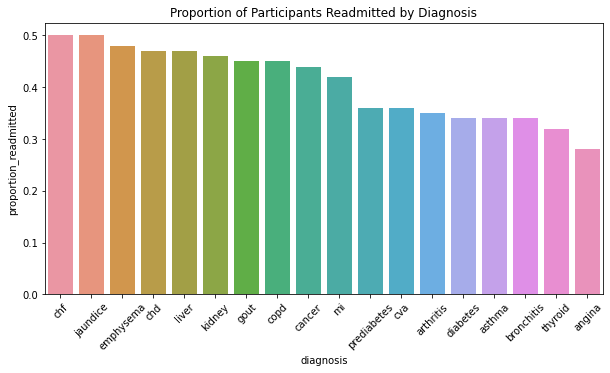

In [36]:
plt.figure(figsize=(10,5))

chart = sns.barplot(x='diagnosis', y='proportion_readmitted', data=dxdf)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_title('Proportion of Participants Readmitted by Diagnosis')

plt.show()

In [37]:

# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = pd.crosstab(nhanes['new_cvd'],nhanes['positive'])
stat, p, dof, expected = chi2_contingency(table)
print('Chi-squared stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')
table

Chi-squared stat=62.896, p=0.000
Based on the p-value, we reject the null hypothesis


positive,False,True
new_cvd,,
False,5739,190
True,49,14


In [38]:

# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = pd.crosstab(nhanes['chf'],nhanes['positive'])
stat, p, dof, expected = chi2_contingency(table)
print('Chi-squared stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')
table

Chi-squared stat=144.189, p=0.000
Based on the p-value, we reject the null hypothesis


positive,False,True
chf,,
0.0,5339,155
1.0,175,39


In [39]:

# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = pd.crosstab(nhanes['kidney'],nhanes['positive'])
stat, p, dof, expected = chi2_contingency(table)
print('Chi-squared stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')
table

Chi-squared stat=98.972, p=0.000
Based on the p-value, we reject the null hypothesis


positive,False,True
kidney,,
0.0,5313,159
1.0,203,36


In [40]:

# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = pd.crosstab(nhanes['angina'],nhanes['positive'])
stat, p, dof, expected = chi2_contingency(table)
print('Chi-squared stat=%.3f, p=%.3f' % (stat, p))
if p <0.05:
    print('Based on the p-value, we reject the null hypothesis')
else:
    print('Based on the pvalue, we fail to reject the null hypothesis.')
table

Chi-squared stat=5.712, p=0.017
Based on the p-value, we reject the null hypothesis


positive,False,True
angina,,
0.0,5383,185
1.0,123,10


The above confirms that readmission for chd participants was significantly more likely (p<0.01) than readmissions for the general population.

In [41]:
n_chd_positive = len(nhanes.loc[(nhanes['chd']==1) & (nhanes['positive']==1)])
n_positive = len(nhanes[nhanes['positive']==1])
chd_positive  = n_chd_positive/n_positive
print('Proportion of chd with readmissions:', chd_positive )

n_cancer_positive = len(nhanes.loc[(nhanes['cancer']==1) & (nhanes['positive']==1)])
n_positive = len(nhanes[nhanes['positive']==1])
cancer_positive  = n_cancer_positive/n_positive
print('Proportion of cancer with readmissions:', cancer_positive )

Proportion of chd with readmissions: 0.16176470588235295
Proportion of cancer with readmissions: 0.2696078431372549


In [42]:
n_chf_positive = len(nhanes.loc[(nhanes['chf']==1) & (nhanes['positive']==1)])
n_positive = len(nhanes[nhanes['positive']==1])
chf_positive  = n_chf_positive/n_positive
print('Proportion of chf with readmissions:', chf_positive )

Proportion of chf with readmissions: 0.19117647058823528


In [43]:
n_gout_positive = len(nhanes.loc[(nhanes['gout']==1) & (nhanes['positive']==1)])
n_positive = len(nhanes[nhanes['positive']==1])
gout_positive  = n_gout_positive/n_positive
print('Proportion of gout with readmissions:', gout_positive )

Proportion of gout with readmissions: 0.12254901960784313


In [44]:
n_emphysema_positive = len(nhanes.loc[(nhanes['emphysema']==1) & (nhanes['positive']==1)])
n_emphysema = len(nhanes.loc[(nhanes['emphysema']==1)])
emphysema_positive = n_emphysema_positive/n_emphysema
emphysema_positive

0.16

In [45]:
n_emphysema_positive = len(nhanes.loc[(nhanes['emphysema']==1) & (nhanes['positive']==1)])
n_positive = len(nhanes[nhanes['positive']==1])
emphysema_positive  = n_emphysema_positive/n_positive
print('Proportion of emphysema with readmissions:', emphysema_positive )

Proportion of emphysema with readmissions: 0.09803921568627451


In [46]:
n_copd_positive = len(nhanes.loc[(nhanes['copd']==1) & (nhanes['positive']==1)])
n_positive = len(nhanes[nhanes['positive']==1])
copd_positive  = n_copd_positive/n_positive
print('Proportion of copd with readmissions:', copd_positive )

Proportion of copd with readmissions: 0.13725490196078433


The median hospital stays of both the new onset cvd and nhanes were 1 and 0, respectively. This makes sense, since new onset CVD patients would be more likely to have been hospitalized when compared with the general population. To further examine the frequency data, we'll group together '2, 3, 4, 5, and 6' selections for numhosp, and compare the percent of stays between the nhanes and newcvd subset. 

In [47]:
cvd_over1 = newcvd.loc[newcvd.numhosp>1]
cvd_over1_total=cvd_over1.numhosp.value_counts().sum()
cvd_allstays = newcvd.numhosp.value_counts().sum()
cvd_percent_over1 = (cvd_over1_total/cvd_allstays * 100).round(1)
print('For the new onset CVD subset, ', cvd_percent_over1, '% of participants had 2 or more hospital stays.')
print(' Median - readmissions for new onset CVD participants who had a hospital stay: ', cvd_over1.numhosp.median(),'\n')

nhanes_over1 = nhanes.loc[nhanes.numhosp>1]
nhanes_over1_total=nhanes_over1.numhosp.value_counts().sum()
nhanes_allstays = nhanes.numhosp.value_counts().sum()
nhanes_percent_over1 = (nhanes_over1_total/nhanes_allstays * 100).round(1)
print('For the overall NHANES dataset, ', nhanes_percent_over1, '% of participants had 2 or more hospital stays.')

print(' Median - readmissions for overall nhanes participants who had a hospital stay: ', nhanes_over1.numhosp.median(),'\n')

For the new onset CVD subset,  36.8 % of participants had 2 or more hospital stays.
 Median - readmissions for new onset CVD participants who had a hospital stay:  3.0 

For the overall NHANES dataset,  3.4 % of participants had 2 or more hospital stays.
 Median - readmissions for overall nhanes participants who had a hospital stay:  2.0 



#### Hospital readmissions are more common with new onset CVD, when compared with hospital readmissions for the general population.


Next, we will examine other factors that could affect number of hospital admissions.

In [48]:
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Columns: 135 entries, seqn to negative
dtypes: bool(4), float64(125), int64(2), object(4)
memory usage: 6.0+ MB


### Next we will look at the frequency of positive vs negative readmissions for individuals with various medical conditions. 

In [49]:
#will reduce dataset to only participants with 1 or more hospital stays.
#creating new dataframe
df = nhanes[nhanes['numhosp_new']>0]

#creating 'readmission' column to indicate positive (true) or negative (false) readmission
df['readmission'] = df['numhosp_new'] > 1


C:\Users\caras\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
dfmc = df[['gender','readmission', 'cancer', 'copd', 'kidney']].copy()
dfmc.readmission.value_counts()


False    466
True     204
Name: readmission, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670 entries, 9 to 5989
Columns: 136 entries, seqn to readmission
dtypes: bool(5), float64(125), int64(2), object(4)
memory usage: 694.2+ KB


Text(0.5, 1.0, 'Relationship Between Readmissions and Depression Score')

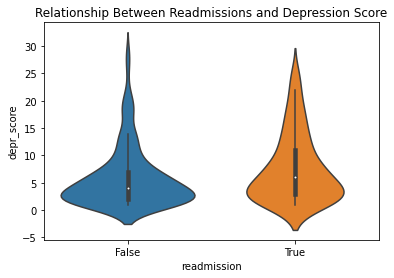

In [52]:
chart = sns.violinplot(data = df, x='readmission', y='depr_score')
chart.set_title("Relationship Between Readmissions and Depression Score")


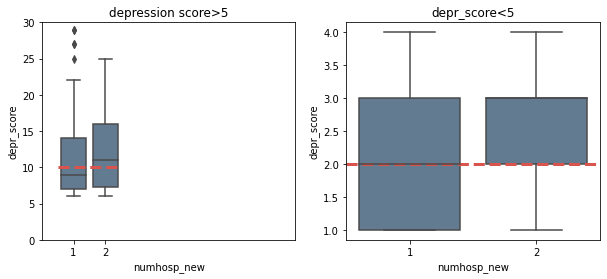

median depression score for df (depr score <5):  2.0
median depression score for df (depr score >5): 10.0
overall median depression score for df: 4.5
proportion of df with depr score <5: 33.134328358208954
proportion of df with depr score >5: 27.761194029850746


In [53]:
#Depression Score

f, axs = plt.subplots(2,2,figsize=(10,4))
color=sns.xkcd_rgb["slate blue"]

plt.subplot(1,2,1)
sns.boxplot(data = df[df['depr_score']>5], x='numhosp_new', y='depr_score', color=color)
plt.title('depression score>5')
xmed=df[df['depr_score']>5].depr_score.median()
x = plt.gca().axes.get_xlim()
plt.plot(x, len(x) * [xmed], sns.xkcd_rgb["pale red"],linestyle='--', linewidth='3')
plt.ylim(0,30)
plt.xlim(-1, 7)

xmed2=df[df['depr_score']<5].depr_score.median()
plt.subplot(1,2,2)
sns.boxplot(data= df[df['depr_score']<5], x='numhosp_new', y='depr_score', color=color)
plt.title('depr_score<5')
x = plt.gca().axes.get_xlim()
plt.plot(x, len(x) * [xmed2], sns.xkcd_rgb["pale red"], linestyle='--', linewidth='3')
plt.show()

n=len(df['depr_score'])
print('median depression score for df (depr score <5): ' , df[df['depr_score']<5].depr_score.median())
print('median depression score for df (depr score >5):', df[df['depr_score']>5].depr_score.median())
print('overall median depression score for df:', df.depr_score.median())
print('proportion of df with depr score <5:', len(df[df['depr_score']<5])/len(df['depr_score'])*100)
print('proportion of df with depr score >5:', len(df[df['depr_score']>5])/len(df['depr_score'])*100)




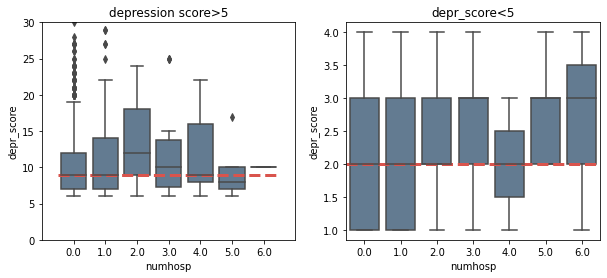

median depression score for nhanes (depr score <5):  2.0
median depression score for nhanes (depr score >5): 9.0
overall median depression score for nhanes: 3.0
proportion of nhanes with depr score <5: 36.44859813084112
proportion of nhanes with depr score >5: 18.80841121495327


In [54]:
#Depression Score for 

f, axs = plt.subplots(2,2,figsize=(10,4))
color=sns.xkcd_rgb["slate blue"]

plt.subplot(1,2,1)
sns.boxplot(data = nhanes[nhanes['depr_score']>5], x='numhosp', y='depr_score', color=color)
plt.title('depression score>5')
xmed=nhanes[nhanes['depr_score']>5].depr_score.median()
x = plt.gca().axes.get_xlim()
plt.plot(x, len(x) * [xmed], sns.xkcd_rgb["pale red"],linestyle='--', linewidth='3')
plt.ylim(0,30)
plt.xlim(-1, 7)

xmed2=nhanes[nhanes['depr_score']<5].depr_score.median()
plt.subplot(1,2,2)
sns.boxplot(data= nhanes[nhanes['depr_score']<5], x='numhosp', y='depr_score', color=color)
plt.title('depr_score<5')
x = plt.gca().axes.get_xlim()
plt.plot(x, len(x) * [xmed2], sns.xkcd_rgb["pale red"], linestyle='--', linewidth='3')
plt.show()

n=len(nhanes['depr_score'])
print('median depression score for nhanes (depr score <5): ' , nhanes[nhanes['depr_score']<5].depr_score.median())
print('median depression score for nhanes (depr score >5):', nhanes[nhanes['depr_score']>5].depr_score.median())
print('overall median depression score for nhanes:', nhanes.depr_score.median())
print('proportion of nhanes with depr score <5:', len(nhanes[nhanes['depr_score']<5])/len(nhanes['depr_score'])*100)
print('proportion of nhanes with depr score >5:', len(nhanes[nhanes['depr_score']>5])/len(nhanes['depr_score'])*100)

In [55]:
depr_score = nhanes['depr_score']
depr_score = depr_score.fillna(depr_score.median())
nhanes['depr_score'] = depr_score

depr_score = newcvd['depr_score']
depr_score = depr_score.fillna(depr_score.median())
newcvd['depr_score'] = depr_score

print('proportion of nhanes with depr score <5:', len(nhanes[nhanes['depr_score']<5])/len(nhanes['depr_score']))
print('proportion of nhanes with depr score >5:', len(nhanes[nhanes['depr_score']>=5])/len(nhanes['depr_score']))

print('proportion of newcvd with depr score <5:', len(newcvd[newcvd['depr_score']<5])/len(newcvd['depr_score']))
print('proportion of newcvd with depr score >5:', len(newcvd[newcvd['depr_score']>=5])/len(newcvd['depr_score']))


proportion of nhanes with depr score <5: 0.7671895861148198
proportion of nhanes with depr score >5: 0.23281041388518023
proportion of newcvd with depr score <5: 0.23684210526315788
proportion of newcvd with depr score >5: 0.7631578947368421


#### The proportion of newcvd participants with higher depression score seems to be greater when compared to the general population.

Continuing to explore some of the other features of the dataset and their relationship to number of hospital readmissions, we will look at possible relationships between number of admission and participant ethnicity.

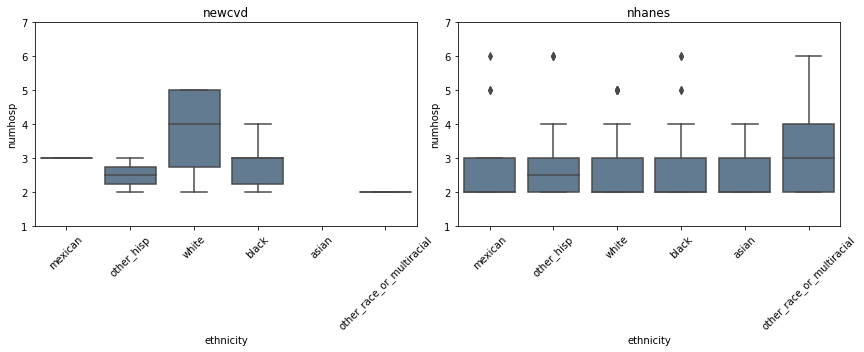

In [57]:
#number of hospital stays by ethnicity
f, axs = plt.subplots(2,2,figsize=(12,5))
color=sns.xkcd_rgb["slate blue"]


plt.subplot(1,2,1)
plt.title('newcvd')
plt.xticks(rotation=45)
plt.ylim(1,7)
plt.tight_layout()
sns.boxplot(data= cvd_over1, x='ethnicity', y='numhosp', color=color, order=('mexican','other_hisp', 'white', 'black', 'asian', 'other_race_or_multiracial'))
plt.subplot(1,2,2)
plt.title('nhanes')
plt.ylim(1,7)
plt.xticks(rotation=45)
plt.tight_layout()
sns.boxplot(data= nhanes_over1, x='ethnicity', y='numhosp', color=color, order=('mexican', 'other_hisp', 'white', 'black', 'asian', 'other_race_or_multiracial'))
plt.show()


#### In regard to ethnicity, the number of hospital stays for those who identified as non-hispanic Black is higher in the new onset CVD subset.

Next, we will examine percentage of individuals that are Black in the subset vs the full dataset to get a better picture.


In [58]:
cvd_black = cvd_over1.loc[newcvd.ethnicity == 'black']
cvd_black_total=cvd_black.ethnicity.value_counts().sum()
cvd_all_ethnicities = cvd_over1.ethnicity.value_counts().sum()
cvd_percent_black = (cvd_black_total/cvd_all_ethnicities * 100).round(1)
print('For the new onset CVD subset, ', cvd_percent_black, '% of participants identified as Black.')
print(' Median - number of admissions for Black ethnicity new onset CVD participants who had 2 or more hospital stays: ', cvd_black.numhosp.median(),'\n')

cvd_white = cvd_over1.loc[newcvd.ethnicity == 'white']
cvd_white_total=cvd_white.ethnicity.value_counts().sum()
cvd_all_ethnicities = cvd_over1.ethnicity.value_counts().sum()
cvd_percent_white = (cvd_white_total/cvd_all_ethnicities * 100).round(1)
print('For the new onset CVD subset, ', cvd_percent_white, '% of participants identified as White.')
print(' Median - number of admissions for White ethnicity new onset CVD participants who had 2 or more hospital stays: ', cvd_white.numhosp.median(),'\n')


nhanes_black = nhanes_over1.loc[nhanes.ethnicity == 'black']
nhanes_black_total=nhanes_black.ethnicity.value_counts().sum()
nhanes_all_ethnicities = nhanes_over1.ethnicity.value_counts().sum()
nhanes_percent_black = (nhanes_black_total/nhanes_all_ethnicities * 100).round(1)
print('For nhanes ', nhanes_percent_black, ' % of participants identified as Black.')
print(' Median - number of admissions for Black ethnicity NHANES participants who had 2 or more hospital stays: ', nhanes_black.numhosp.median(),'\n')

nhanes_white = nhanes_over1.loc[nhanes.ethnicity == 'white']
nhanes_white_total=nhanes_white.ethnicity.value_counts().sum()
nhanes_all_ethnicities = nhanes_over1.ethnicity.value_counts().sum()
nhanes_percent_white = (nhanes_white_total/nhanes_all_ethnicities * 100).round(1)
print('For nhanes, ', nhanes_percent_white, '% of participants identified as White.')
print(' Median - number of admissions for White ethnicity nhanes participants who had 2 or more hospital stays: ', nhanes_white.numhosp.median(),'\n')


For the new onset CVD subset,  42.9 % of participants identified as Black.
 Median - number of admissions for Black ethnicity new onset CVD participants who had 2 or more hospital stays:  3.0 

For the new onset CVD subset,  28.6 % of participants identified as White.
 Median - number of admissions for White ethnicity new onset CVD participants who had 2 or more hospital stays:  4.0 

For nhanes  27.0  % of participants identified as Black.
 Median - number of admissions for Black ethnicity NHANES participants who had 2 or more hospital stays:  2.0 

For nhanes,  30.4 % of participants identified as White.
 Median - number of admissions for White ethnicity nhanes participants who had 2 or more hospital stays:  2.0 



The percentage of participants who are Black in the subset is greater than that in the overall dataset (43% and 27% respectively), and the percentage of participants who are white in newcvd is similar to overall dataset (29% and 30% respectively). The median number of hospital stays is greatest in those in the White new onset CVD group. 

#### This suggests a correlation between White ethnicity and recurrence of hospital stays for new onset CVD. THere also appears to be a correlation of Black ethnicity and recurrence of hospital stays, but this does not seem as strong. Further investigation is needed as to the strength of the correlations and possible reasons this would be the case.

Next, we will examine how food security issues may affect hospital number of hospital admissions.



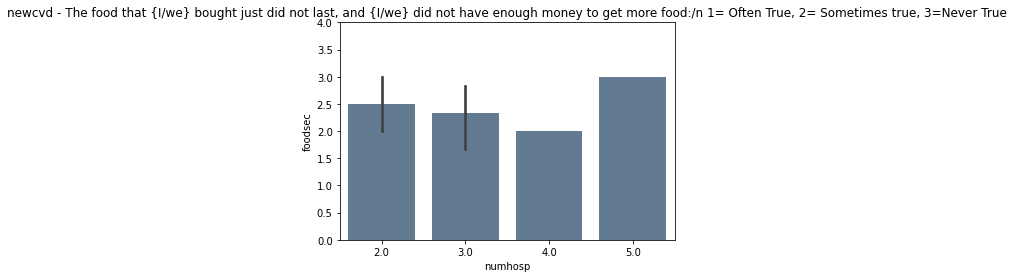

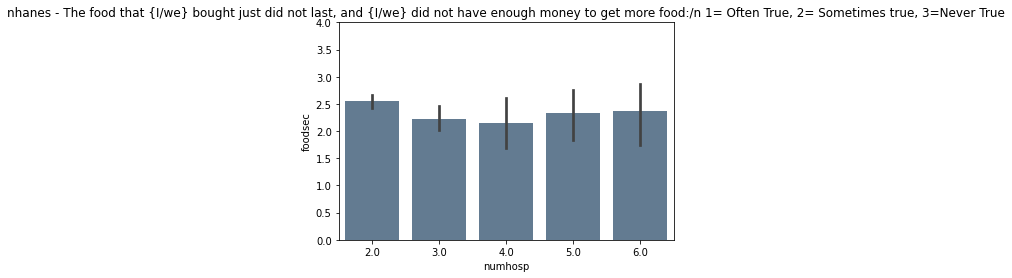

median foodsec for new cvd:  3.0
median foodsec score for nhanes:  3.0


In [59]:
color=sns.xkcd_rgb["slate blue"]

sns.barplot(data = cvd_over1, x='numhosp', y='foodsec', color=color)
plt.title('newcvd - The food that {I/we} bought just did not last, and {I/we} did not have enough money to get more food:/n 1= Often True, 2= Sometimes true, 3=Never True')
plt.ylim(0,4)
plt.show()
sns.barplot(data=nhanes_over1, x='numhosp', y='foodsec', color=color)
plt.title('nhanes - The food that {I/we} bought just did not last, and {I/we} did not have enough money to get more food:/n 1= Often True, 2= Sometimes true, 3=Never True')
plt.ylim(0,4)
plt.show()
print('median foodsec for new cvd: ', cvd_over1.foodsec.median())
print('median foodsec score for nhanes: ' , nhanes_over1.foodsec.median())


#### It does not appear that newcvd dataset are being affected by food availability compared with the general population (NHANES) that has also been admitted to the hospital in the year of the study. 
However, food security may be related to hospital readmission in a similar way in both datasets. A better analysis may examine overall NHANES dataset, including participants who had no hospitalizations, to the NHANES subset we have here (those who had 2 or more hospital admissions). 

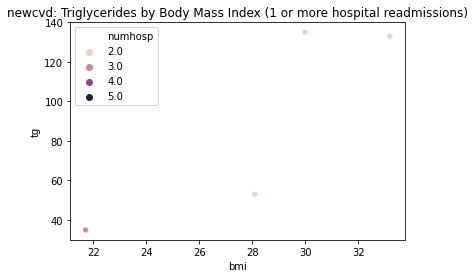

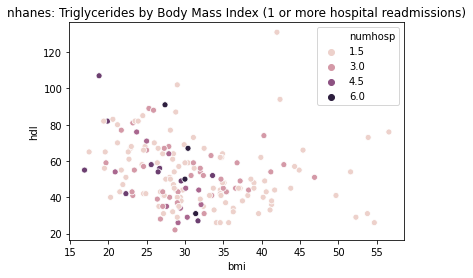

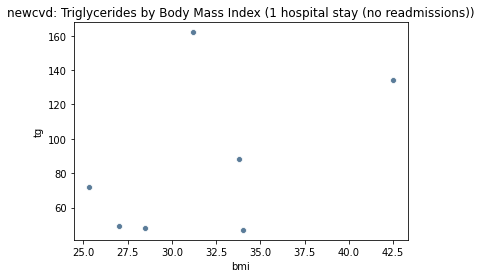

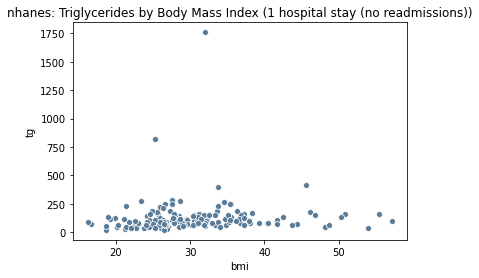

In [60]:
#create scatterplots looking at data for numhosp=1 and numhosp>1 for newcvd and nhanes
# age and blood labs/physical calcs, depr_score and blood labs/calcs,

cvd_over1 = newcvd.loc[newcvd.numhosp>1]
cvd1stay=newcvd.loc[newcvd.numhosp==1]
nhanes_over1=nhanes.loc[nhanes.numhosp>1]
nhanes1stay=nhanes.loc[nhanes.numhosp==1]

sns.scatterplot(data = cvd_over1, x='bmi', y='tg', color=color,hue='numhosp')
plt.title('newcvd: Triglycerides by Body Mass Index (1 or more hospital readmissions)')
plt.show()


sns.scatterplot(data = nhanes_over1, x='bmi', y='hdl', color=color, hue='numhosp')
plt.title('nhanes: Triglycerides by Body Mass Index (1 or more hospital readmissions)')
plt.show()


sns.scatterplot(data = cvd1stay, x='bmi', y='tg', color=color)
plt.title('newcvd: Triglycerides by Body Mass Index (1 hospital stay (no readmissions))')
plt.show()


plt.title('nhanes: Triglycerides by Body Mass Index (1 hospital stay (no readmissions))')
sns.scatterplot(data = nhanes1stay, x='bmi', y='tg', color=color)
plt.show()

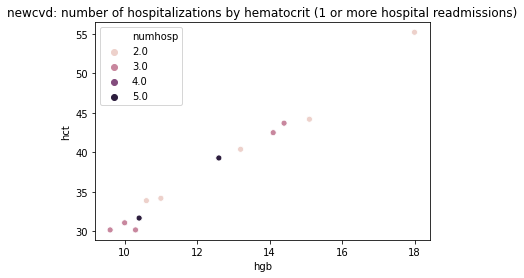

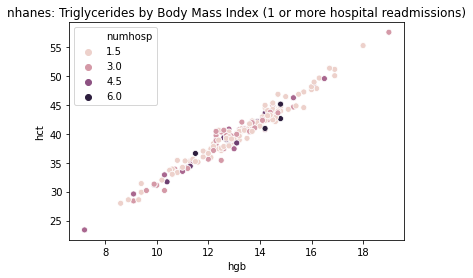

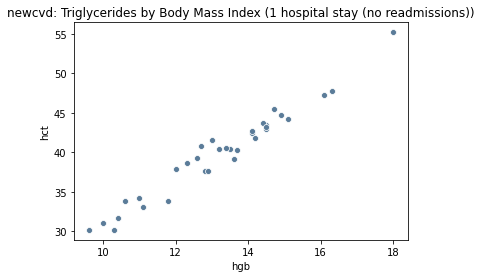

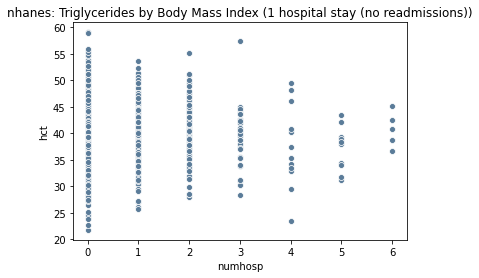

In [61]:
#create scatterplots looking at data for numhosp=1 and numhosp>1 for newcvd and nhanes
# age and blood labs/physical calcs, depr_score and blood labs/calcs,

cvd_over1 = newcvd.loc[newcvd.numhosp>1]
cvd1stay=newcvd.loc[newcvd.numhosp==1]
nhanes_over1=nhanes.loc[nhanes.numhosp>1]
nhanes1stay=nhanes.loc[nhanes.numhosp==1]

sns.scatterplot(data = cvd_over1, x='hgb', y='hct', color=color,hue='numhosp')
plt.title('newcvd: number of hospitalizations by hematocrit (1 or more hospital readmissions)')
plt.show()


sns.scatterplot(data = nhanes_over1, x='hgb', y='hct', color=color, hue='numhosp')
plt.title('nhanes: Triglycerides by Body Mass Index (1 or more hospital readmissions)')
plt.show()


sns.scatterplot(data = newcvd, x='hgb', y='hct', color=color)
plt.title('newcvd: Triglycerides by Body Mass Index (1 hospital stay (no readmissions))')
plt.show()


plt.title('nhanes: Triglycerides by Body Mass Index (1 hospital stay (no readmissions))')
sns.scatterplot(data = nhanes, x='numhosp', y='hct', color=color)
plt.show()

In [62]:
# Create an array with colors
colors = ["#6495ed", "#ff6347"]
# Set custom color palette
sns.set_palette(sns.color_palette(colors))
# create a column for more informative leend plotting
nhanes.loc[nhanes['numhosp'] > 1, 'readmission'] = 'Positive'
nhanes.loc[nhanes['numhosp'] == 1, 'readmission'] = 'Negative'
newcvd.loc[newcvd['numhosp']>1, 'readmission'] = 'Positive'
newcvd.loc[newcvd['numhosp']==1, 'readmission']='Negative'

Text(0.5, 0.98, 'Distribution of age groups - NHANES')

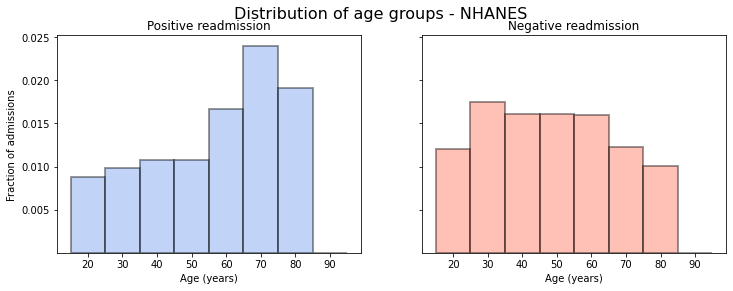

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey=True)

sns.distplot(nhanes[nhanes.numhosp>1]['age'], bins=(np.arange(20,110, 10) - 5), kde=False, norm_hist=True, \
             hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0], color='#6495ed')
ax[0].set_xlabel('Age (years)')
ax[0].set_ylabel('Fraction of admissions')
ax[0].set_title("Positive readmission")
ax[0].set_yticks([0.005, 0.010, 0.015, 0.020, .0250, .030, .035, .040, .045, .050])

sns.distplot(nhanes[nhanes.numhosp<=1]['age'], bins=(np.arange(20,110, 10) - 5), kde=False, norm_hist=True, \
            hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1], color='#ff6347')
ax[1].set_xlabel('Age (years)')
#ax[1].set_ylabel('Fraction of admissions')
ax[1].set_title("Negative readmission")
#ax[1].set_yticks([0.005, 0.010, 0.015, 0.020])
plt.suptitle('Distribution of age groups - NHANES', fontsize=16)#, y=0.999)


Text(0.5, 0.98, 'Distribution of age groups - newcvd')

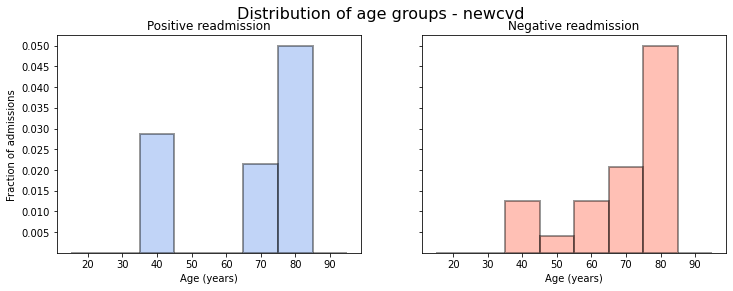

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey=True)

sns.distplot(newcvd[newcvd.numhosp>1]['age'], bins=(np.arange(20,110, 10) - 5), kde=False, norm_hist=True, \
             hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0], color='#6495ed')
ax[0].set_xlabel('Age (years)')
ax[0].set_ylabel('Fraction of admissions')
ax[0].set_title("Positive readmission")
ax[0].set_yticks([0.005, 0.010, 0.015, 0.020,.0250, .030, .035, .040, .045, .050])

sns.distplot(newcvd[newcvd.numhosp<=1]['age'], bins=(np.arange(20,110, 10) - 5), kde=False, norm_hist=True, \
            hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1], color='#ff6347')
ax[1].set_xlabel('Age (years)')
#ax[1].set_ylabel('Fraction of admissions')
ax[1].set_title("Negative readmission")
#ax[1].set_yticks([0.005, 0.010, 0.015, 0.020])
plt.suptitle('Distribution of age groups - newcvd', fontsize=16)#, y=0.999)

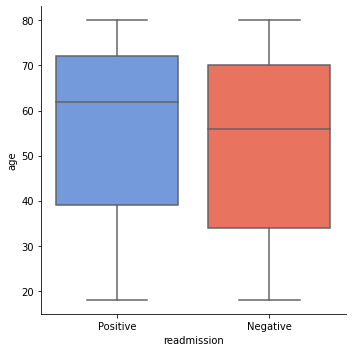

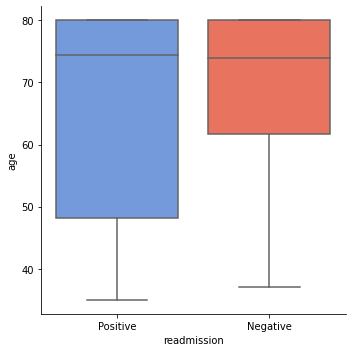

In [65]:
sns.catplot(x="readmission", y="age", kind='box', data=nhanes);
sns.catplot(x="readmission", y="age", kind='box', data=newcvd);


In [66]:
all_labs = nhanes[['fglucose', 'hdl','tg', 'ldl', \
               'tchol','hgba1c','bmi', 'bodyfatpct',  'wbc', 'lymphocytes', 'monocytes', 'neutrophils', 'eosinophil',\
               'basophils', 'rbc', 'hgb', 'hct', 'mcv', 'mch', 'mchgb', 'rdw', 'plt', 'mpv', 'alb', 'alp', 'ast', \
               'alt', 'bun','bicarbonate', 'calcium', 'cholesterol', 'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose',\
               'ggt', 'iron','potassium', 'ldh', 'sodium', 'osmolality', 'phosphorus', 'tbili', 'protein', 'triglycerides',\
               'uricacid']]
labs = nhanes[['fglucose', 'hdl','tg', 'ldl', 'tchol','hgba1c','bmi', 'bodyfatpct','rbc', 'hgb', 'hct', 'mcv', 'mch',\
               'mchgb', 'rdw', 'plt', 'mpv', 'alb', 'alp', 'ast', 'alt', 'bun','bicarbonate', 'calcium', 'cholesterol',\
               'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose', 'ggt', 'iron','potassium', 'ldh', 'sodium',\
               'osmolality', 'phosphorus', 'tbili', 'protein', 'triglycerides', 'uricacid']]

corr_matrix = labs.corr(method='pearson')
corr_matrix


,fglucose,hdl,tg,ldl,tchol,hgba1c,bmi,bodyfatpct,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid
fglucose,1.000000,-0.171216,0.219186,0.057917,0.054465,0.845074,0.176638,0.099429,0.057202,0.047442,0.037282,-0.034208,-0.012502,0.046647,0.053113,-0.022084,0.084238,-0.122925,0.156082,0.004131,0.082297,0.121932,0.005936,0.068718,0.049185,-0.040944,-0.252955,0.024272,0.105248,0.988892,0.106186,-0.047309,0.143972,0.022957,-0.194190,0.347061,-0.041996,-0.017261,0.011234,0.220096,0.018129
hdl,-0.171216,1.000000,-0.356487,-0.080297,0.163065,-0.164172,-0.276753,-0.044294,-0.227749,-0.179906,-0.165913,0.108330,0.051098,-0.110281,-0.001548,-0.020617,-0.050555,0.017521,-0.128308,-0.042056,-0.193590,-0.012528,0.075915,0.067314,0.171506,-0.065412,-0.075755,-0.070851,-0.075016,-0.174488,-0.051099,0.091139,-0.053353,0.042423,0.008225,-0.091420,0.067878,0.030673,-0.058274,-0.401033,-0.242978
tg,0.219186,-0.356487,1.000000,0.269861,0.363178,0.219718,0.140954,0.038216,0.101202,0.156162,0.128913,0.030143,0.074843,0.153540,-0.034878,0.011613,0.009440,0.008393,0.105754,0.057517,0.191753,0.036737,-0.036521,0.042231,0.352475,-0.009510,-0.141131,0.002301,0.021037,0.215440,0.149715,0.040918,0.040001,0.017762,-0.102276,0.033185,-0.038592,-0.063226,0.026950,0.996072,0.180029
ldl,0.057917,-0.080297,0.269861,1.000000,0.917863,0.051480,0.084186,0.086603,0.136433,0.127515,0.133452,-0.017447,-0.005658,0.031110,-0.070684,0.128788,-0.017012,0.004560,0.061335,0.012765,0.118275,-0.037855,0.025435,0.045124,0.911443,-0.034762,-0.031747,-0.033453,0.078436,0.049752,0.104875,0.057019,0.017130,0.012994,0.017413,0.018945,-0.005758,-0.011894,0.080524,0.272666,0.098648
tchol,0.054465,0.163065,0.363178,0.917863,1.000000,0.063470,0.013861,0.079391,0.071741,0.126614,0.117719,0.063626,0.078746,0.085464,-0.082408,0.098594,-0.030951,0.044996,0.060728,0.054476,0.120598,-0.015434,0.036394,0.121493,0.990983,-0.023393,-0.119082,-0.049090,0.014268,0.039294,0.121642,0.089873,-0.012959,0.116250,-0.023414,-0.010268,0.041587,-0.040365,0.048555,0.397721,0.054724
hgba1c,0.845074,-0.164172,0.219718,0.051480,0.063470,1.000000,0.211814,0.107995,0.044372,-0.031719,-0.016199,-0.089870,-0.096482,-0.068216,0.122408,0.014725,0.081566,-0.181165,0.166109,0.027666,0.070997,0.145799,0.032824,0.047063,0.051546,-0.014066,-0.238159,0.050463,0.160061,0.794578,0.082406,-0.100461,0.147354,0.087578,-0.185976,0.295670,-0.003430,-0.074507,0.013397,0.203616,0.037115
bmi,0.176638,-0.276753,0.140954,0.084186,0.013861,0.211814,1.000000,0.610549,0.076660,-0.052981,-0.034397,-0.171096,-0.170139,-0.091420,0.190847,0.136249,0.088686,-0.306480,0.161538,0.030949,0.141361,0.004373,-0.106346,-0.120561,0.001225,0.032010,0.039913,-0.005066,0.193570,0.171302,0.069600,-0.224600,0.051973,0.152421,-0.039971,0.056142,-0.079573,-0.153558,-0.047909,0.137355,0.249636
bodyfatpct,0.099429,-0.044294,0.038216,0.086603,0.079391,0.107995,0.610549,1.000000,-0.303172,-0.436938,-0.427207,-0.182099,-0.213606,-0.196382,0.207647,0.286134,0.071689,-0.452608,0.130772,-0.048544,-0.034048,-0.159836,-0.250224,-0.222970,0.079476,-0.264547,0.159049,-0.289548,0.269507,0.091114,0.014162,-0.330854,-0.103137,0.036560,-0.108493,-0.104650,-0.042354,-0.282621,-0.089315,0.019912,-0.180952
rbc,0.057202,-0.227749,0.101202,0.136433,0.071741,0.044372,0.076660,-0.303172,1.000000,0.692193,0.771247,-0.386145,-0.325633,-0.030310,-0.037368,-0.040184,0.059343,0.341443,0.041700,0.037500,0.192697,-0.105808,0.050461,0.185714,0.071478,0.127583,-0.106537,-0.029160,-0.065588,0.020888,-0.000950,0.169632,0.017137,-0.011075,0.058996,0.007861,-0.078281,0.154409,0.198355,0.098091,0.236148
hgb,0.047442,-0.179906,0.156162,0.127515,0.126614,-0.031719,-0.052981,-0.436938,0.692193,1.000000,0.970432,0.355980,0.449129,0.494817,-0.468158,-0.200047,0.017213,0.439518,0.007664,0.095299,0.251375,-0.049667,0.123138,0.23202

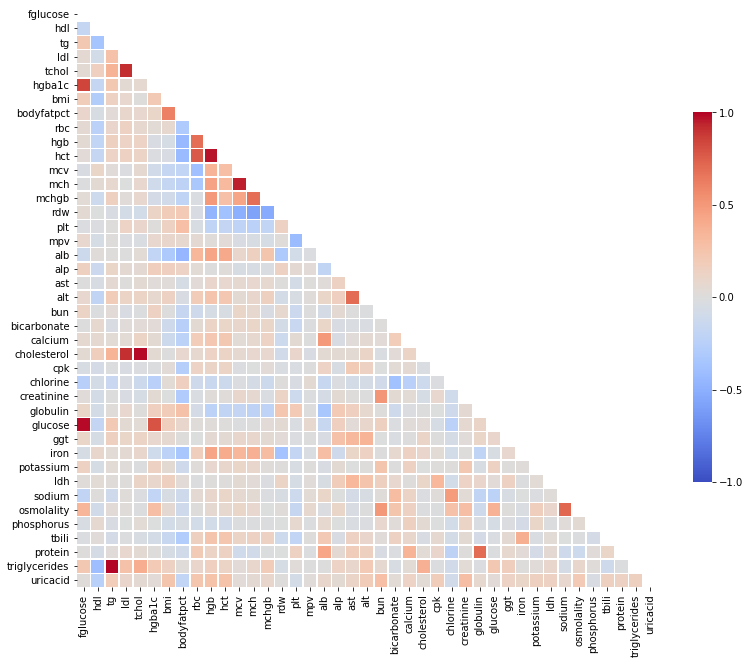

In [67]:

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(13, 17))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = False,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


Text(0.5, 0.999, 'Positively correlated mean lab measurements')

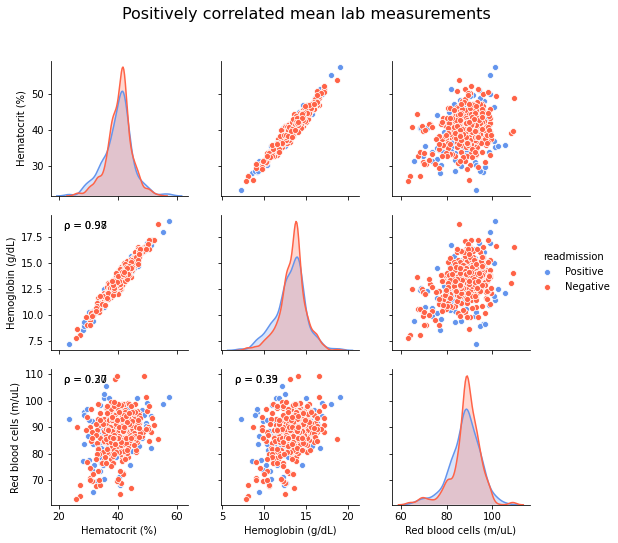

In [68]:
from scipy.stats import pearsonr
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
nhanes_adj = nhanes.fillna(nhanes.mean())
    
pp = sns.pairplot(nhanes_adj, vars=['hct', 'hgb', 'mcv'], \
             hue='readmission', kind='scatter') 
pp.map_lower(corrfunc)

pp.axes[0,0].set_ylabel('Hematocrit (%)')
pp.axes[1,0].set_ylabel('Hemoglobin (g/dL)')
pp.axes[2,0].set_ylabel('Red blood cells (m/uL)')

pp.axes[2,0].set_xlabel('Hematocrit (%)')
pp.axes[2,1].set_xlabel('Hemoglobin (g/dL)')
pp.axes[2,2].set_xlabel('Red blood cells (m/uL)')

#plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Positively correlated mean lab measurements", fontsize=16, y=0.999)


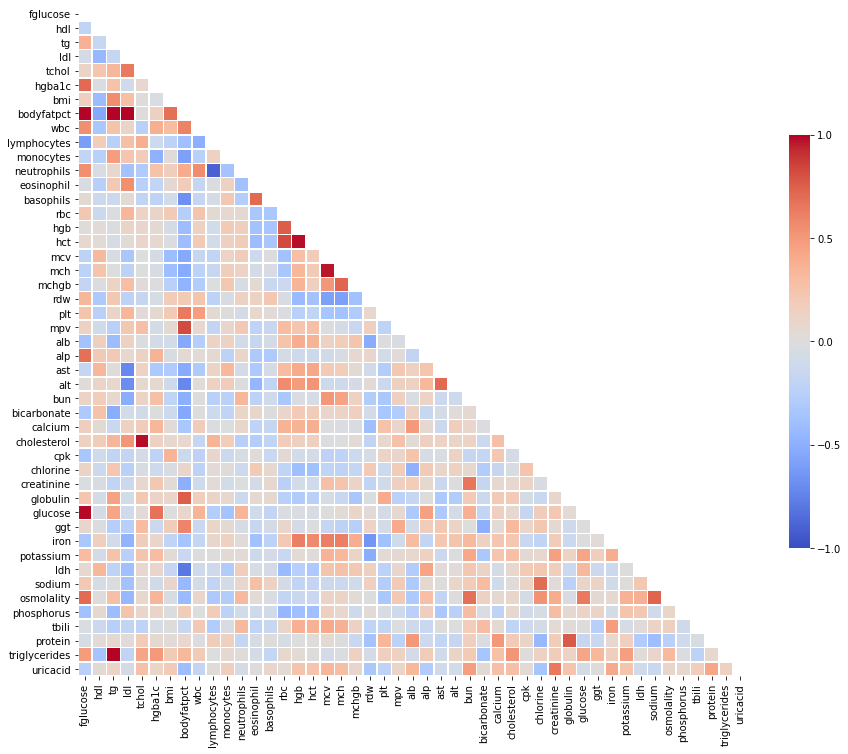

In [70]:
labs = newcvd[['fglucose', 'hdl','tg', 'ldl', \
               'tchol','hgba1c','bmi', 'bodyfatpct',  'wbc', 'lymphocytes', 'monocytes', 'neutrophils', 'eosinophil',\
               'basophils', 'rbc', 'hgb', 'hct', 'mcv', 'mch', 'mchgb', 'rdw', 'plt', 'mpv', 'alb', 'alp', 'ast', \
               'alt', 'bun','bicarbonate', 'calcium', 'cholesterol', 'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose',\
               'ggt', 'iron','potassium', 'ldh', 'sodium', 'osmolality', 'phosphorus', 'tbili', 'protein', 'triglycerides',\
               'uricacid']]



corr_matrix = labs.corr(method='pearson')
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 19))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = False,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [71]:

#Let's look at if there is a difference in lab values between 
# newcvd and nhanes re-admissions.
from scipy.stats import ttest_ind
nhanes = nhanes.fillna(nhanes.median())
newcvd=newcvd.fillna(newcvd.median())
def ttest_print(column):
    group1 = nhanes[nhanes['numhosp'] > 1][column]
    group2 = newcvd[newcvd['numhosp'] > 1][column]
    print("t-test between group 1 and group 2 for {}".format(column))
    print(ttest_ind(group1, group2, equal_var=False))
    
test_cols = ['tg', 'ldl', 'glucose', 'rdw', 'plt', \
             'bun']

for column in test_cols:
    ttest_print(column)

t-test between group 1 and group 2 for tg
Ttest_indResult(statistic=2.801627585036889, pvalue=0.01192843646591916)
t-test between group 1 and group 2 for ldl
Ttest_indResult(statistic=13.808608019859866, pvalue=2.710825665953788e-12)
t-test between group 1 and group 2 for glucose
Ttest_indResult(statistic=-0.20548090144802078, pvalue=0.8398939895612295)
t-test between group 1 and group 2 for rdw
Ttest_indResult(statistic=-1.8658928167702102, pvalue=0.08204097993822335)
t-test between group 1 and group 2 for plt
Ttest_indResult(statistic=0.7351146613716971, pvalue=0.473150992607712)
t-test between group 1 and group 2 for bun
Ttest_indResult(statistic=-1.4571129354979546, pvalue=0.16620118400893516)


In [72]:
#Let's look at if there is a difference in lab values between 
# nhanes re-admissions vs one hospital stay.
from scipy.stats import ttest_ind
nhanes = nhanes.fillna(nhanes.median())
newcvd=newcvd.fillna(newcvd.median())
def ttest_print(column):
    group1 = nhanes[nhanes['numhosp'] > 1][column]
    group3 = nhanes[nhanes['numhosp'] == 1][column]
    print("t-test between group 1 and group 2 for {}".format(column))
    print(ttest_ind(group1, group3, equal_var=False))
    
test_cols = ['tg', 'ldl', 'glucose', 'rdw', 'plt', \
             'bun']

for column in test_cols:
    ttest_print(column)

t-test between group 1 and group 2 for tg
Ttest_indResult(statistic=-0.9265906993696994, pvalue=0.3544738379133888)
t-test between group 1 and group 2 for ldl
Ttest_indResult(statistic=-0.8363337884954686, pvalue=0.4034134576047712)
t-test between group 1 and group 2 for glucose
Ttest_indResult(statistic=0.7216353747500495, pvalue=0.4710337998663856)
t-test between group 1 and group 2 for rdw
Ttest_indResult(statistic=3.1211960548771835, pvalue=0.001962143483999914)
t-test between group 1 and group 2 for plt
Ttest_indResult(statistic=0.050039497342369586, pvalue=0.9601208421854124)
t-test between group 1 and group 2 for bun
Ttest_indResult(statistic=2.9507001503254697, pvalue=0.003415383338108378)


In [73]:
#We'll do the same to compare newcvd readmissions those with a single hospital stay

#Let's look at if there is a difference in lab values between 
# newcvd and nhanes re-admissions.
from scipy.stats import ttest_ind
nhanes = nhanes.fillna(nhanes.median())
newcvd=newcvd.fillna(newcvd.median())
def ttest_print(column):
    group1 = newcvd[newcvd['numhosp'] > 1][column]
    group2 = newcvd[newcvd['numhosp'] ==  1][column]
    print("t-test between group 1 and group 2 for {}".format(column))
    print(ttest_ind(group1, group2, equal_var=False))
    
test_cols = ['tg', 'ldl', 'glucose', 'rdw', 'plt', \
             'bun']

for column in test_cols:
    ttest_print(column)

t-test between group 1 and group 2 for tg
Ttest_indResult(statistic=0.09931701044748774, pvalue=0.9216649994581112)
t-test between group 1 and group 2 for ldl
Ttest_indResult(statistic=-1.8457607266340526, pvalue=0.07887197038751005)
t-test between group 1 and group 2 for glucose
Ttest_indResult(statistic=-0.8655036924199895, pvalue=0.393476015819781)
t-test between group 1 and group 2 for rdw
Ttest_indResult(statistic=1.7629565103016747, pvalue=0.0916036762095569)
t-test between group 1 and group 2 for plt
Ttest_indResult(statistic=0.046536781112270505, pvalue=0.9632671725245318)
t-test between group 1 and group 2 for bun
Ttest_indResult(statistic=1.2335743012278009, pvalue=0.23038070857071624)


In [74]:
pd.crosstab(nhanes['readmission'],nhanes['new_cvd'])




new_cvd,False,True
readmission,,
Negative,442,24
Positive,190,14


In [75]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = pd.crosstab(nhanes['readmission'],nhanes['new_cvd'])
stat, p, dof, expected = chi2_contingency(table)
print('Chi-squared stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Chi-squared stat=0.491, p=0.484
Probably independent
